**Daniel Goings<br>
dcgoings@buffalo.edu<br>
MTH337 Project 3 - Model Building, Curve Fitting, and the Mayfly Model**

In [339]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
%matplotlib inline

# PART 1: Curve Fitting

### INTRODUCTION

Throughout the first half of this project, we will analyze data given that compares varying heights and times recorded for a series of free fall experiments between a steel ball and plastic ball. The objectives of this project are to first learn how to manipulate data given into a more manageable format, plot the data and demonstrate the graphical relationship between height and time, and calculate curve fitting equations for the given data in order to effectively draw a most effective straight line overlapping the points.

### PROBLEM 1: Import the data using the NumPy file I/O commands (np.loadtxt) into two arrays - one each for the steel and the plastic ball. You will need to set the delimiter to tab spacing, i.e. use delimiter = '\t' in the argument of the function np.loadtxt. Also, you will need to skip the first few rows of text to get to the data.

In [340]:
# Accepts input file for plastic and steel ball data, splits data based on delimiter, and ignores the first four rows

plasticData = np.loadtxt("freefallPlastic.txt", delimiter='\t', skiprows=4)
steelData = np.loadtxt("freefallSteel.txt", delimiter='\t', skiprows=4)

In [341]:
print("Plastic Ball Data in height vs time\n %s" % plasticData)
print("Steel Ball Data in height(cm) vs time(s)\n %s\n" % steelData)

Plastic Ball Data in height vs time
 [[ 19.6      0.2025]
 [ 19.6      0.2031]
 [ 19.6      0.2036]
 [ 19.6      0.2033]
 [ 19.6      0.203 ]
 [ 25.7      0.2301]
 [ 25.7      0.2307]
 [ 25.7      0.2301]
 [ 25.7      0.2306]
 [ 25.7      0.2304]
 [ 30.2      0.2508]
 [ 30.2      0.2509]
 [ 30.2      0.251 ]
 [ 30.2      0.2508]
 [ 30.2      0.2509]
 [ 35.1      0.2707]
 [ 35.1      0.2713]
 [ 35.1      0.2716]
 [ 35.1      0.2716]
 [ 35.1      0.2714]
 [ 40.4      0.2895]
 [ 40.4      0.2898]
 [ 40.4      0.29  ]
 [ 40.4      0.2902]
 [ 40.4      0.2901]
 [ 46.2      0.3096]
 [ 46.2      0.3101]
 [ 46.2      0.3102]
 [ 46.2      0.31  ]
 [ 46.2      0.3097]]
Steel Ball Data in height(cm) vs time(s)
 [[ 19.8      0.2028]
 [ 19.8      0.2034]
 [ 19.8      0.2034]
 [ 19.8      0.2039]
 [ 19.8      0.2038]
 [ 25.8      0.2305]
 [ 25.8      0.2306]
 [ 25.8      0.2307]
 [ 25.8      0.2307]
 [ 25.8      0.2304]
 [ 30.4      0.2508]
 [ 30.4      0.2509]
 [ 30.4      0.2508]
 [ 30.4      0.25

### PROBLEM 2: Plot the data and demonstrate that $y$ vs $t$ for both the balls is a parabola. You will need to set a proper aspect ratio (figsize) to see it clearly.

The plot below shows both the graphical representation of both the plastic and steel balls in relation to their height and time during the free fall experiments. Although very slight, we can immediately see the bend/curve of the parabola revealed by the data given.

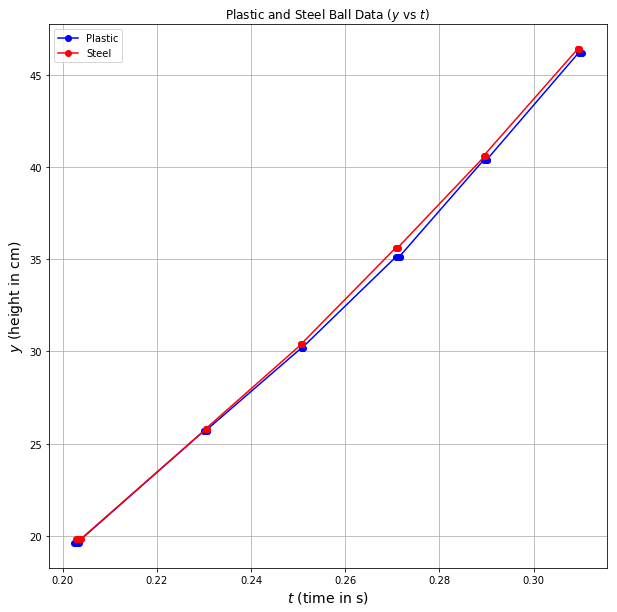

In [342]:
plt.figure(figsize=(10,10))
plt.plot(plasticData[:,1], plasticData[:,0], '-o', color='blue', label='Plastic')
plt.plot(steelData[:,1], steelData[:,0], '-o', color='red', label='Steel')

plt.title('Plastic and Steel Ball Data ($y$ vs $t$)')
plt.xlabel('$t$ (time in s)', fontsize = 14)
plt.ylabel('$y$ (height in cm)', fontsize = 14)
plt.grid()
plt.legend()

### PROBLEM 3: Create a data set for $t^2$ for both the balls and make plots. Write down your observations. What shape do you think the $y$ vs $t^2$ plots look like?

In [343]:
plasticDataSq = plasticData[:,1]**2
steelDataSq = steelData[:,1]**2
print("New t^2 values for plastic ball:\n %s\n" % plasticDataSq)
print("New t^2 values for steel ball:\n %s\n" %steelDataSq)

New t^2 values for plastic ball:
 [ 0.04100625  0.04124961  0.04145296  0.04133089  0.041209    0.05294601
  0.05322249  0.05294601  0.05317636  0.05308416  0.06290064  0.06295081
  0.063001    0.06290064  0.06295081  0.07327849  0.07360369  0.07376656
  0.07376656  0.07365796  0.08381025  0.08398404  0.0841      0.08421604
  0.08415801  0.09585216  0.09616201  0.09622404  0.0961      0.09591409]

New t^2 values for steel ball:
 [ 0.04112784  0.04137156  0.04137156  0.04157521  0.04153444  0.05313025
  0.05317636  0.05322249  0.05322249  0.05308416  0.06290064  0.06295081
  0.06290064  0.06285049  0.06285049  0.07327849  0.07327849  0.07360369
  0.073441    0.07349521  0.08392609  0.08386816  0.08392609  0.08386816
  0.08375236  0.09572836  0.09579025  0.09591409  0.09579025  0.09591409]



Although the graphs will likely look similar based on the automatic x-limits, the time spent is clearly a fraction of the time (t) and is linear compared ot the $y$ vs $t$ data given. The $t^2$ is a straight line compared to the $t$ data, which appears as a parabola. This is because in the original given formula, $y$ is proportional to $t^2$, which is why plotting $y$ vs $x$ for $y = x^2$ appears as a parabola. However, given $y$ vs $t^2$, these end up being proportional to each other, and therefore appears linearly. 

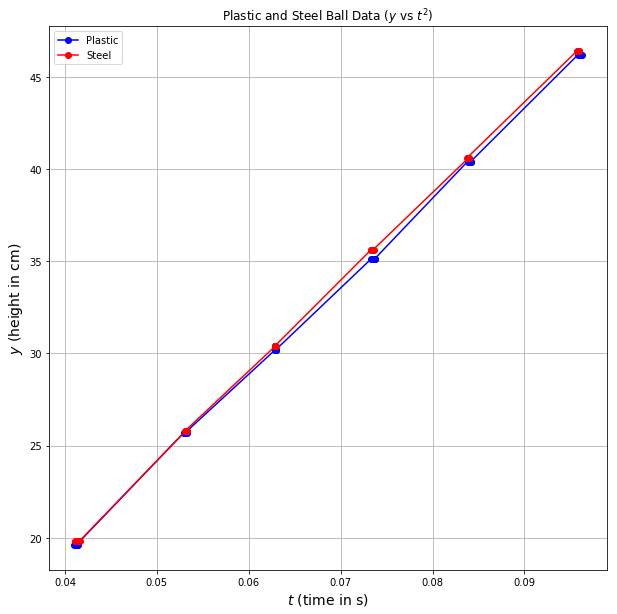

In [344]:
plt.figure(figsize=(10,10))
plt.plot( plasticData[:,1]**2, plasticData[:,0], '-o', color='blue', label='Plastic')
plt.plot( steelData[:,1]**2, steelData[:,0], '-o', color='red', label='Steel')
plt.title('Plastic and Steel Ball Data ($y$ vs $t^2$)')
plt.xlabel('$t$ (time in s)', fontsize = 14)
plt.ylabel('$y$ (height in cm)', fontsize = 14)
plt.grid()
plt.legend()

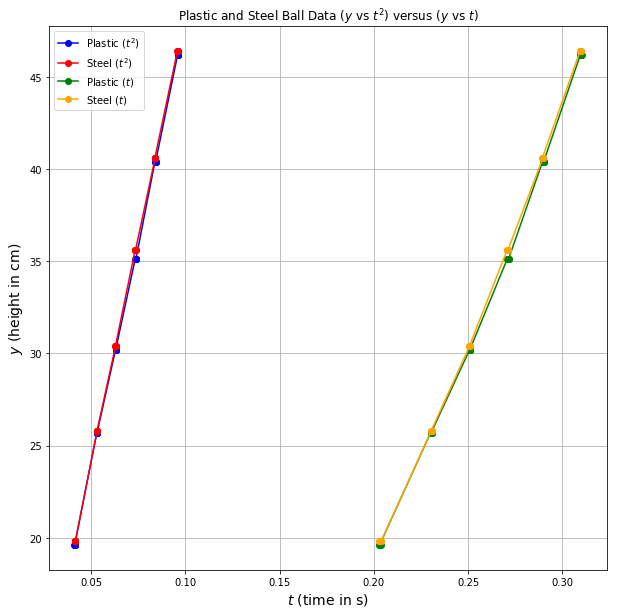

In [345]:
plt.figure(figsize=(10,10))
plt.plot( plasticData[:,1]**2, plasticData[:,0], '-o', color='blue', label='Plastic ($t^2$)')
plt.plot( steelData[:,1]**2, steelData[:,0], '-o', color='red', label='Steel ($t^2$)')
plt.plot(plasticData[:,1], plasticData[:,0], '-o', color='green', label='Plastic ($t$)')
plt.plot(steelData[:,1], steelData[:,0], '-o', color='orange', label='Steel ($t$)')
plt.title('Plastic and Steel Ball Data ($y$ vs $t^2$) versus ($y$ vs $t$)')
plt.xlabel('$t$ (time in s)', fontsize = 14)
plt.ylabel('$y$ (height in cm)', fontsize = 14)
plt.grid()
plt.legend()

### PROBLEM 4: Use the plots and the curve fitting machinery to make a straight line fit to the data in both cases. The function requires that you input the data in a specific manner. Create a 2D array $X$ where $X_{ij} = \phi_j(x_i)$ like we did in class. Then feed this array and the array for $y$ into the function to get the parameters for the fit.

In [346]:
#reshape data
steelMatrix = steelData[:,0].reshape(30,1)
plasticMatrix = plasticData[:,0].reshape(30,1)

#length of arrays
s_len = len(steelData)
p_len = len(plasticData)

# prints array with ones zipped in the plastic and steel data
sX = np.array([np.ones(s_len), steelData[:,1]**2]).T
pX = np.array([np.ones(p_len), plasticData[:,1]**2]).T

print (pX)

[[ 1.          0.04100625]
 [ 1.          0.04124961]
 [ 1.          0.04145296]
 [ 1.          0.04133089]
 [ 1.          0.041209  ]
 [ 1.          0.05294601]
 [ 1.          0.05322249]
 [ 1.          0.05294601]
 [ 1.          0.05317636]
 [ 1.          0.05308416]
 [ 1.          0.06290064]
 [ 1.          0.06295081]
 [ 1.          0.063001  ]
 [ 1.          0.06290064]
 [ 1.          0.06295081]
 [ 1.          0.07327849]
 [ 1.          0.07360369]
 [ 1.          0.07376656]
 [ 1.          0.07376656]
 [ 1.          0.07365796]
 [ 1.          0.08381025]
 [ 1.          0.08398404]
 [ 1.          0.0841    ]
 [ 1.          0.08421604]
 [ 1.          0.08415801]
 [ 1.          0.09585216]
 [ 1.          0.09616201]
 [ 1.          0.09622404]
 [ 1.          0.0961    ]
 [ 1.          0.09591409]]


The "specific manner" mentioned in the problem is acknowledged and rectified by the above code. We needed to convert the data into manageable matrices such that our data can be used and implemented in the following equation.

### PROBLEM 5: The function will output the values of $\beta_0$ and $\beta_1$ as an array where $\beta_0$ and $\beta_1$ are the coefficients in the linear fit between $y$ and $t^2$. What do you expect the value of $\beta_0$ and $\beta_1$ to be? Why?

Given the free fall formula at the beginning of our project, we can use this to quickly estimate $\beta_1$ to be in the ballpark of $\frac{1}{2}g$, where $g = 9.8m/s^2$ or, $980cm/s^2$. Since we are calculating a straight line fit for the data, there will be an error of margin, but remain around approximately $490$.

With regards to $\beta_0$, and again referring back to our free fall formula, since $y_0 = 0$, we should expect $\beta_0$ to remain close to this number for similar reasons stated above for $\beta_1$.

In [347]:
def normalEquationSolver(X, y):
    """
    This function solves the normal equations for linear regression using
    least squares method by taking in the values of X and y. Here, y is the 
    target and X is constructed using the model as X_ij = phi_j(x_i). 
    The output is an array containing the best fit parameters for the model
    using the data.
    
    Keywords:
    X: this is the matrix containing the values (phi_j(x_i))
    y: this matrix contains the values of y which the model tries to predict
    beta: this is the output of the function. It contains the parameters
          of the fitting model in an array.
    
    """
    
    # Solve the matrix equation (X'X)beta = X'y for beta 
    # where ' means transpose
    
    beta = np.linalg.solve(X.T.dot(X), X.T.dot(y))
    
    return beta
    

In [348]:
beta_p = normalEquationSolver(pX, plasticMatrix)
beta_s = normalEquationSolver(sX, steelMatrix)

print("Plastic:\n %s\n" % beta_p)
print("Steel:\n %s\n" % beta_s)

Plastic:
 [[ -1.55994473e-01]
 [  4.82101051e+02]]

Steel:
 [[ -2.41302530e-01]
 [  4.87245487e+02]]



As predicted, our $\beta_0$ and $\beta_1$ values had a reasonable margin of error for our $490$ and $0$ value estimations, which will be further acknowledged below in 1.6.

### PROBLEM 6: Using these parameters, extract the value of $g$ from the data. Do this for both the steel ball data as well as the plastic ball data. Are the values of $g$ the same or different? Justify.

Using the given equation $y = \beta_0+ \beta_1t^2$, we can extract the value $g$ by plugging in the above results containing the parameters of the fitting model for the steel and plastic balls.

**Plastic:** 

$$\beta_0 = -.155994473$$

$$\beta_1 = 482.101051$$

$$y = -.155994473 + 482.101051\,\, ^*\,\, t^2$$

We know:

$$\frac{1}{2}g = 482.101051$$

Therefore..

$$g = 964.202102cm/s^2$$


**Steel:**

$$\beta_0 = -.24130253$$

$$\beta_1 = 487.245487$$

$$y = -.24130253 + 487.245487\,\, ^*\,\, t^2$$

We know:

$$\frac{1}{2}g = 487.245487$$

Therefore..

$$g = 974.490974cm/s^2$$

Taking all variables into consideration, these results should be expected. Although the values of $g$ are different for both cases compared to the actual value for gravitational acceleration, there are too many variables that likely played a role in the difference of values. While wind resistance and/or user error in timer calculations are likely candidates, the margin of error is still negligible. 

### PROBLEM 7: Finally, plot the data $y$ vs $t^2$ and the fits for both balls and demonstrate that the fits work.

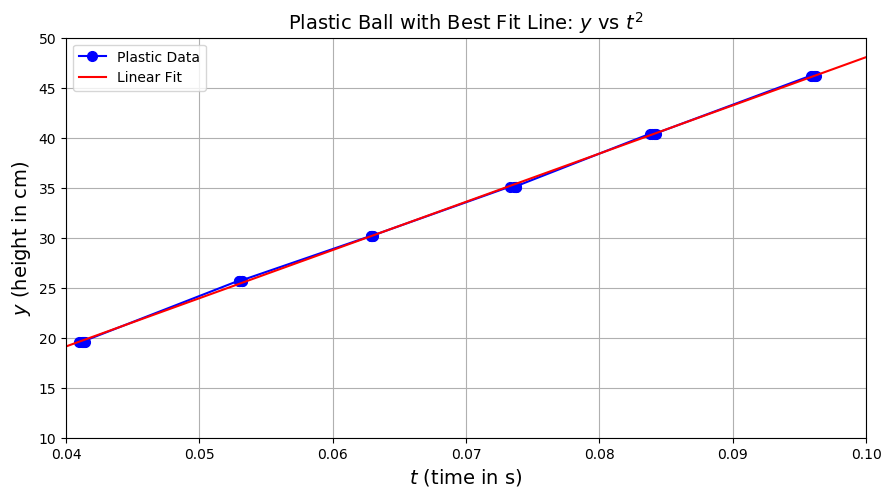

In [349]:
fig, ax = plt.subplots(figsize=(8,4), dpi = 100)

ax = fig.add_axes([0,0,1,1])
ax.set_xlim([.04, .1])
ax.set_ylim([10, 50])

# Plot the data
ax.plot(plasticData[:,1]**2, plasticData[:,0], '-o', markersize = 7, color='blue', label='Plastic Data')

# Plot the straight line using the beta values of the model.
tt = np.linspace(0,20,100)
yy = float(beta_p[0]) + float(beta_p[1])*tt
ax.plot(tt, yy, color='red',label='Linear Fit')

# Labels
ax.set_title('Plastic Ball with Best Fit Line: $y$ vs $t^2$', fontsize = 14)
ax.set_xlabel('$t$ (time in s)', fontsize = 14)
ax.set_ylabel('$y$ (height in cm)', fontsize = 14)
ax.grid()
ax.legend()

plt.show()

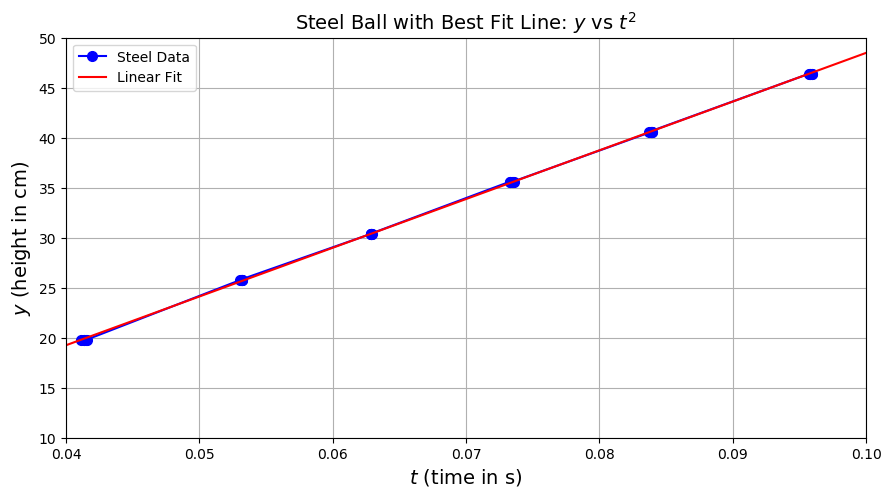

In [350]:
fig, ax = plt.subplots(figsize=(8,4), dpi = 100)

ax = fig.add_axes([0,0,1,1])
ax.set_xlim([.04, .1])
ax.set_ylim([10, 50])

# Plot the data
ax.plot(steelData[:,1]**2, steelData[:,0], '-o', markersize = 7, color='blue', label='Steel Data')

# Plot the straight line using the beta values of the model.
tt = np.linspace(0,20,100)
yy = float(beta_s[0]) + float(beta_s[1])*tt
ax.plot(tt, yy, color='red', label='Linear Fit')

# Labels
ax.set_title('Steel Ball with Best Fit Line: $y$ vs $t^2$', fontsize = 14)
ax.set_xlabel('$t$ (time in s)', fontsize = 14)
ax.set_ylabel('$y$ (height in cm)', fontsize = 14)
ax.grid()
ax.legend()

plt.show()

As shown in both of the above graphs, the best fit line effectively covers the lines and points provided by our plastic and steel ball data. Since this *is* a *best fit line*, it makes sense that we can still see the underlying line of blue in both graphs that depict some of the inaccuracies.

# PART 2: Mayfly Model

### INTRODUCTION

Throughout the second half of our project, we will set up and investigate a system population model, specifically the Mayfly model, which depicts the population of the species over time. We will investigate the relationship of the driving factors that cause the population change, the different effects those factors have as their values change, and how they affect the system population. 

### PROBLEM 1: Use the fact that ${y^*}_{n+1} = {y^*}_n = y^*$ in Eq. 4 to show that the fixed points of the system $y^*$ are $0$ and $1 - \frac{1}{b}$.

Given the fact that ${y^*}_{n+1} = {y^*}_n = y^*$, we can plug in to our given model $y_{n+1} = by_n(1-y_n)$

$$y_{n+1} = by_n(1-y_n) \rightarrow \text{Plug in } y^*$$

$${y^*} = by^* (1-y^*) \rightarrow \text{Distribute } by^*$$

$${y^*} = by^* - b(y^*)^2 \rightarrow \text{Divide both sides by } y^* \,\,\,\,\,\text{NOTE: We observe } y^* = 0$$

$$1 = b - by^* \rightarrow \text{Factor } b$$

$$1 = b(1 - y^*) \rightarrow \text{Divide both sides by } b$$

$$\frac{1}{b} = 1 - y^* \rightarrow \text{Add } b \text{ to both sides}$$

$$\frac{1}{b} + y^* = 1 \rightarrow \text{Subtract } \frac{1}{b} \text{ from both sides}$$

$$y^* = 1 - \frac{1}{b} \text{ and } y^* = 0 \text{ are our solutions}$$

### PROBLEM 2: The fixed point $y^* = 0$ is stable for $0 \leq b \lt 1$ and the fixed point $y^* = 1 - \frac{1}{b}$ is stable for $1 \lt b \lt 3$ for the system. Use the $mayfly$ or the $mayfly2$ function we discussed in class to show that when $b \lt 1$ the system population dies off, i.e. $y^* = 0$ and when $1 \lt b \lt 3$, it tends to saturate to the value $y^* = 1 - \frac{1}{b}$.

In [351]:
def mayfly(b=2, yInit=0.1, n=10):
    """
    Function return the time series of a population using the logistic map based on on input values
    of b, yInit and n.
    
    Keywords:
    b: parameter in the logistic map
    yInit: initial population
    n: number of iterations
    out: numpy array containing the time series of the population through n iterations
    """
    
    # Initialization
    
    out = np.zeros((n,1))
    y = yInit
    
    # Set up a loop for iterations
    
    for i in range(n):
        out[i] = y
        y = b*(1-y)*y
    
    # Return output
    
    return out

In [353]:
# variables a# are used to test and show stability from 0 < a < 1

a0 = 0
a1 = .1
a2 = .5
a3 = .9
a4 = 1

# variables b# are used to test and show stability from 1 < b < 3

b0 = 1.1
b1 = 1.5
b2 = 2
b3 = 2.5
b4 = 2.9

# initial values for population and iterations

yInit = 0.05
n = 50

# all a# and b# pop functions stored for plot use

a0pop = mayfly(a0, yInit, n)
a1pop = mayfly(a1, yInit, n)
a2pop = mayfly(a2, yInit, n)
a3pop = mayfly(a3, yInit, n)
a4pop = mayfly(a4, yInit, n)

b0pop = mayfly(b0, yInit, n)
b1pop = mayfly(b1, yInit, n)
b2pop = mayfly(b2, yInit, n)
b3pop = mayfly(b3, yInit, n)
b4pop = mayfly(b4, yInit, n)

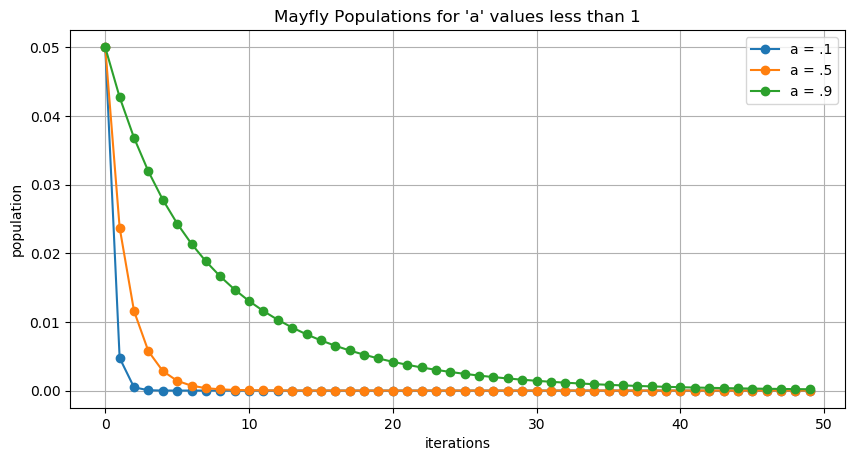

In [354]:
fig, ax = plt.subplots(figsize=(10,5), dpi = 100)

ax.plot(range(n), a1pop, marker='.', markersize=12, label='a = .1')
ax.plot(range(n), a2pop, marker='.', markersize=12, label='a = .5')
ax.plot(range(n), a3pop, marker='.', markersize=12, label='a = .9')

ax.set_title("Mayfly Populations for 'a' values less than 1")
ax.set_xlabel('iterations')
ax.set_ylabel('population')
ax.legend()
ax.grid()

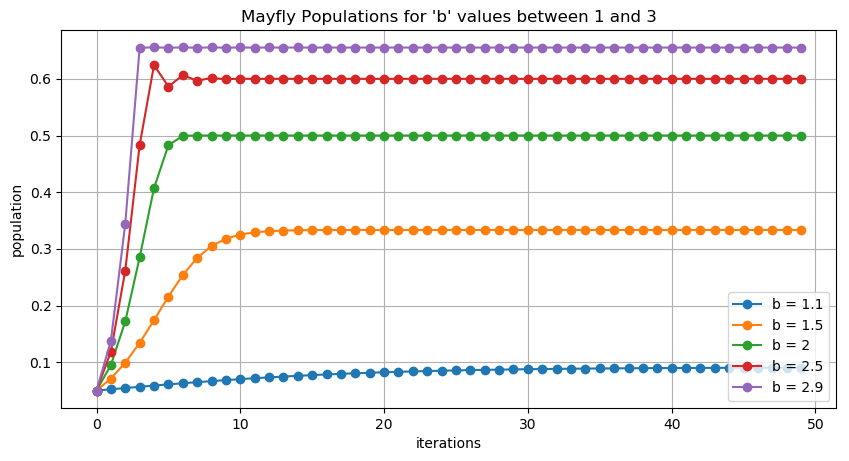

In [355]:
fig, ax = plt.subplots(figsize=(10,5), dpi = 100)

ax.plot(range(n), b0pop, marker='.', markersize=12, label='b = 1.1')
ax.plot(range(n), b1pop, marker='.', markersize=12, label='b = 1.5')
ax.plot(range(n), b2pop, marker='.', markersize=12, label='b = 2')
ax.plot(range(n), b3pop, marker='.', markersize=12, label='b = 2.5')
ax.plot(range(n), b4pop, marker='.', markersize=12, label='b = 2.9')
ax.legend()

ax.set_title("Mayfly Populations for 'b' values between 1 and 3")
ax.set_xlabel('iterations')
ax.set_ylabel('population')
ax.grid()

We are easily able to see in the above graphs that our fixed points are stables for their specific intervals for the system. In our first graph, we can see that for all values of $a$ where $0 \leq a \lt 1$, the system population does in fact die off, and our second graph verifies that for values of $b$ where $1 \lt b \lt 3$ saturate the system population.

### PROBLEM 3: Explore the behavior of the model further for $3 \lt b \leq 4$. What interesting features do you observe?

In [356]:
# variables c# are used to test and show stability from 3 < c < 4
c0 = 3.1
c1 = 3.5
c2 = 4

# initial values for population and iterations
yInit = 0.05
n = 50

# all c# pop functions stored for plot use
c0pop = mayfly(c0, yInit, n)
c1pop = mayfly(c1, yInit, n)
c2pop = mayfly(c2, yInit, n)


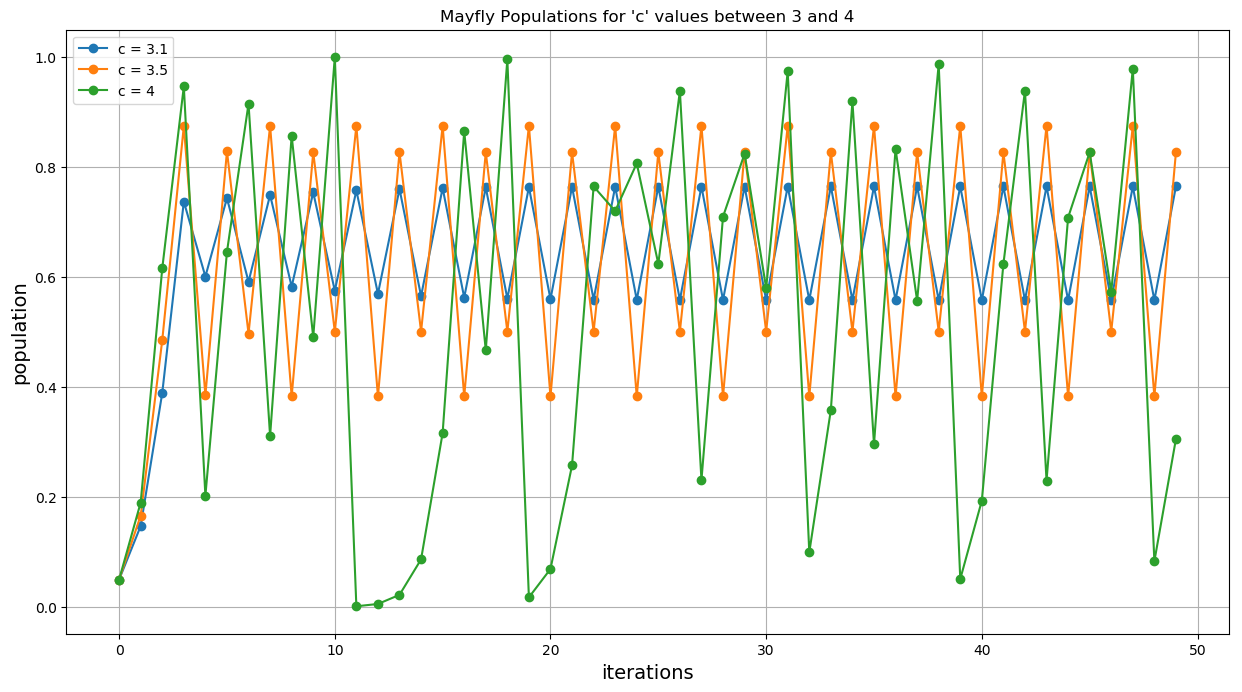

In [357]:
fig, ax = plt.subplots(figsize=(15,8), dpi = 100)

ax.plot(range(n), c0pop, marker='.', markersize=12, label='c = 3.1')
ax.plot(range(n), c1pop, marker='.', markersize=12, label='c = 3.5')
ax.plot(range(n), c2pop, marker='.', markersize=12, label='c = 4')
ax.legend()

ax.set_title("Mayfly Populations for 'c' values between 3 and 4")
ax.set_xlabel('iterations', fontsize=14)
ax.set_ylabel('population', fontsize=14)
ax.grid()

As shown above, for values of $b$ where $3 \lt b \leq 4$, this graph is the polar opposite of what was shown in our previous two graphs for our $a$ and $b$ values. This graphs depicts a complete disconnection of order, patterns and predictability and resembles a more chaotic outlook. For the values $c = 3.1$ and $c = 3.5$ we can see some pattern of oscillation between highs and lows, however, once we push $c = 4$, there is no clear or identifiable pattern for the data.

### PROBLEM 4: Use the $mayfly2$ function to generate population time series $y$ for a range of values of $b$. Choose a large number of iterations $n$ so that the system relaxes to its long time state reliably. Then discard the first few hundred iterations in the population time series and create a bifurcation diagram showing $y$ vs $b$ for late times, such as the one shown in this figure$^1$.

In [358]:
def mayfly2(b = np.linspace(0,4,50), yInit = np.matlib.repmat(0.01, 50, 1), n=50):
    """
    Function that returns time series of popuplation using the mayfly model, for n iterations,
    range of b values given a set of initial conditions.
    
    Keyword:
    b: model parameters list
    yInit: array containing initial conditions for each value of b
    n: number of iterations
    out: 2D matrix with the populations, rows count iterations, columns count parameter values
    """
    
    # Initialization
    m = len(b)
    out = np.zeros((n,m))
    
    # Convert yInit into a row array
    y = yInit.T
    
    # Set up loop for iterations
    # Each row corresponds to next time
    for i in range(n):
        
        out[i, :] = y
        y = b*(1-y)*y
        
    return out

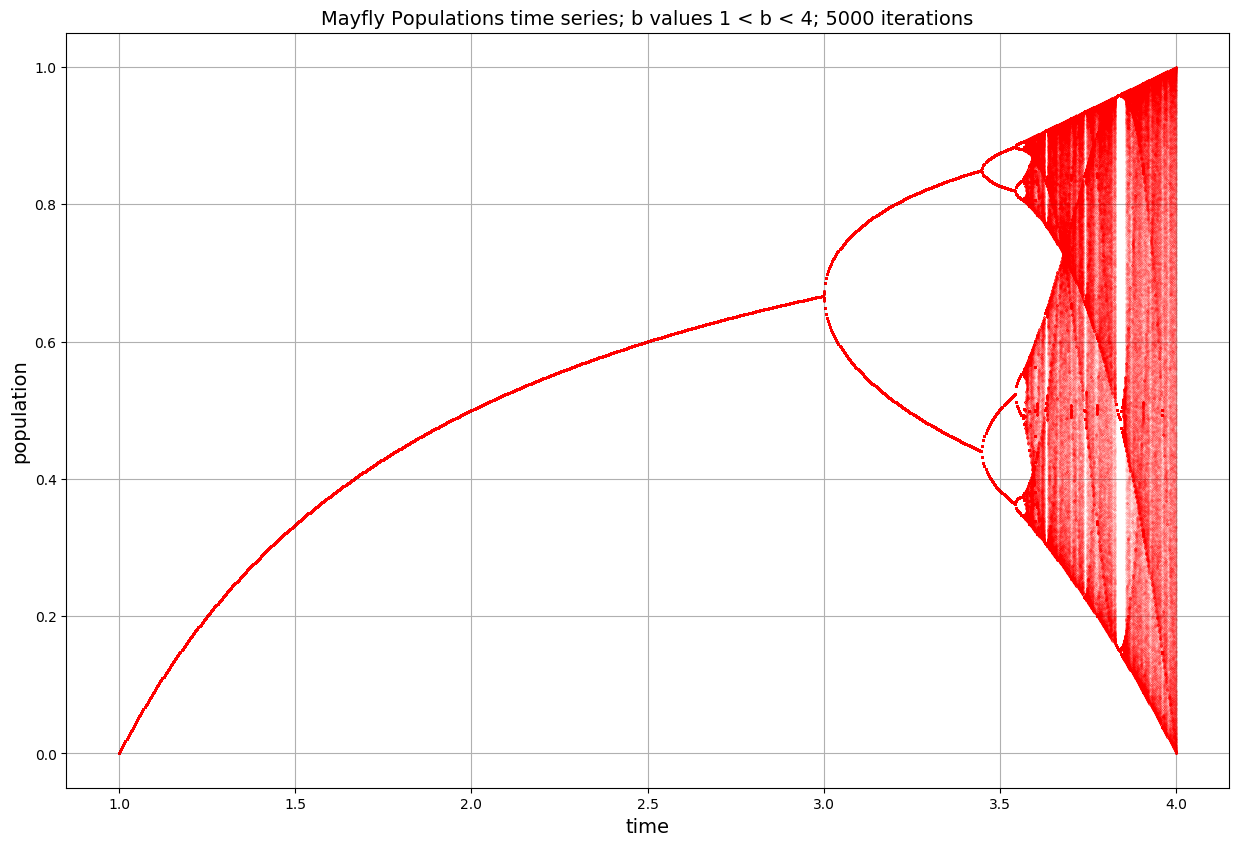

In [359]:
# iterations and skip iterations
n = 5000
skipN = 1000

# number of b values
numOfB = 1000

# creates our array containing all of our b values
# we know b values < 1 result in system population dying off, so we can eliminate that
b = np.linspace(1, 4, numOfB) # we know b values < 1 result in system population dying off

# initial points
yInit = np.matlib.repmat(0.05, numOfB, 1)

#initialize population and plot

pop = mayfly2(b, yInit, n)

fig, ax = plt.subplots(figsize=(15,10), dpi = 100)
ax.set_title("Mayfly Populations time series; b values 1 < b < 4; 5000 iterations", fontsize=14)
ax.set_xlabel('time', fontsize=14)
ax.set_ylabel('population', fontsize=14)
ax.legend()
ax.grid()

for x in range(len(b)):
    B = np.matlib.repmat(b[x], n, 1)        
    y = pop[:, x]

    ax.plot(B[skipN:], pop[skipN:,x], '.', color='r', alpha = .5, markersize=0.1)

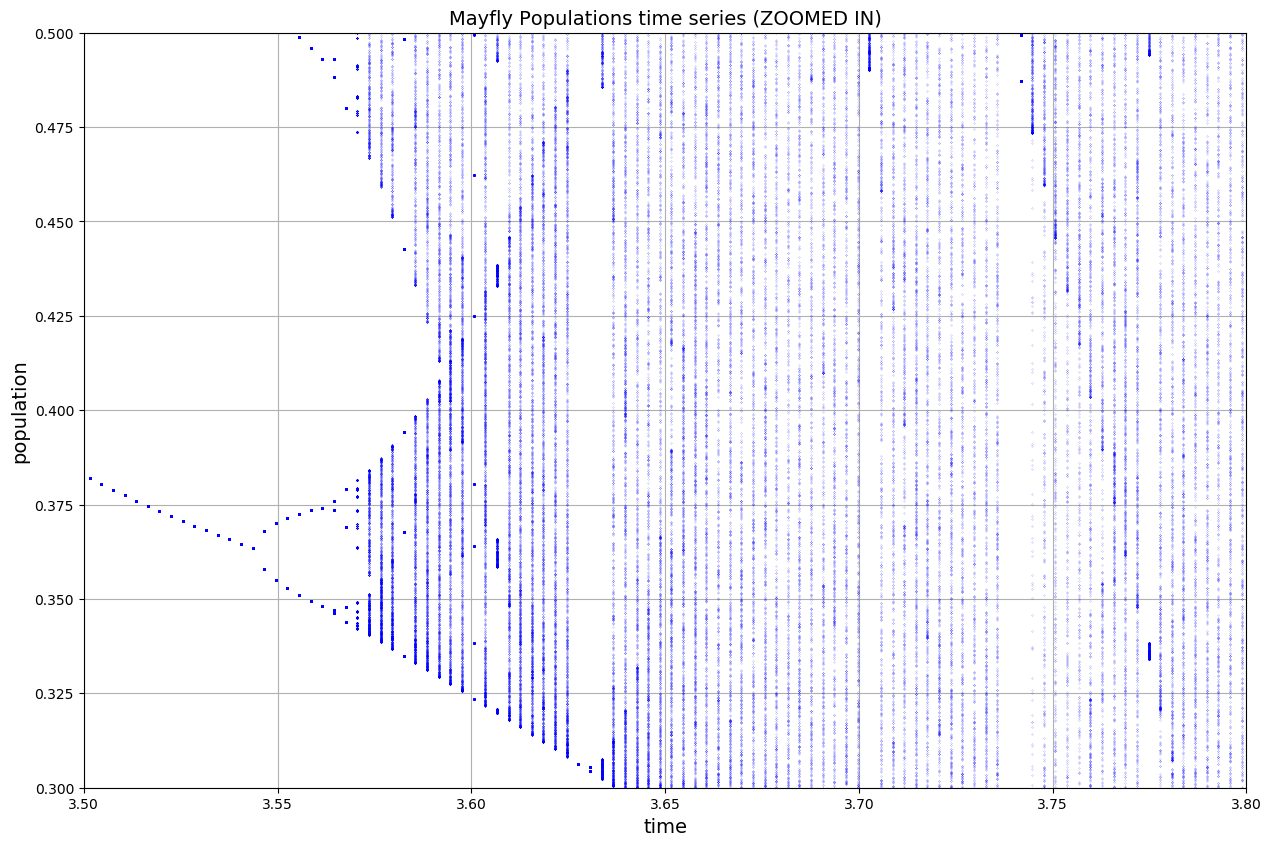

In [360]:
#ZOOMED IN GRAPH, USED FOR FURTHER EXPLANATION IN PROBLEM 2.5

# iterations and skip iterations
n = 5000
skipN = 1000

# number of b values
numOfB = 1000

# creates our array containing all of our b values
# we know b values < 1 result in system population dying off, so we can eliminate that
b = np.linspace(1, 4, numOfB) # we know b values < 1 result in system population dying off

# initial points
yInit = np.matlib.repmat(0.05, numOfB, 1)

#initialize population and plot

pop = mayfly2(b, yInit, n)

fig, ax = plt.subplots(figsize=(15,10), dpi = 100)
ax.set_title("Mayfly Populations time series (ZOOMED IN)", fontsize=14)
ax.set_xlabel('time', fontsize=14)
ax.set_ylabel('population', fontsize=14)
ax.set_xlim(3.5, 3.8)
ax.set_ylim(.3, .5)
ax.legend()
ax.grid()

for x in range(len(b)):
    B = np.matlib.repmat(b[x], n, 1)        
    y = pop[:, x]
    ax.plot(B[skipN:], pop[skipN:,x], '.', color='b', alpha = 1, markersize=0.2)

### PROBLEM 5: Explain the various features of the bifurcation diagram and explain the rich dynamics you observed in parts 2.2 and 2.3 in the context of the bifurcation diagram. You should be able to observe self-similarity. Read up on self-similarity and talk about it in your own words.

In our first three graphs, we were easily able to identify patterns, features, and behaviors demonstrated by the Mayfly model and function. It was clear that our fixed points were stable for their specific intervals, such as with values of $a$ where $0 \leq a \lt 1$, the system population died off, with values of of $b$ where $1 \lt b \lt 3$, we saw a saturation of the system population, and with values of $c$ where $3 \lt c \leq 4$, we saw abnormalities, oscillations and chaos.

Shown most recently in our last two graphs, we do, infact, observe self-similarity. By definition, a self-similar object "is exactly or approximately similar to a part of itself" or simply, where smaller regions in an object resemble a part of the larger picture. How can we tell? Well, we can immediately see at $b = 3$, we have our first split where our single line divided into two branches, also known as a "bifurcation", similar to branches of a tree. Once we get to 3.4-3.5, we see another bifurcation, now showing four branches, and another between 3.5 and 3.6, where we then have eight branches. 

However, this doesn't continue for long. Once we pass ~3.56-3.57, our bifurcations no longer take place, our data no longer converges to any one point and exhibits chaotic and random patterns, such as the ones we saw in our third graph for values of $c$, where $3 \lt c \lt 4$. 

It is worth noting however, that there are very long/vertical spaces or windows of empty space at ~3.6, ~3.75, and ~3.9, where we can identify and notice *some* return and resemblance of stability.



### CONCLUSION

Throughout this project, we were able to successfully analyze a variety of complex data sets and manipulate them in a way to satisfy and accomplish our objectives, which were to find and identify complex patterns, features, errors, and behaviors among free fall experiements, curve fitting, and dynamic population models.

We successfully implemented and solved a variety of complex equations, acknowledged discrepancies in gravity equation results in free fall experiements, and were able to explain their cause. Additionally, we were able to identify patterns in the Mayfly population model, when the population is expected to die off or saturate, and at what point the population loses control of any pattern and turns to chaos.

### SOURCES

Class Notes / Professor's Notes/Emails